### Import the required libraries & Load Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve 
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv('./Datasets/Telco_Customer.csv')
df

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.81667,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.81667,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.81667,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.81667,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.81667,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.81667,-6.2,6897.8
7039,7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.81667,-6.2,2782.0
7040,7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.81667,-6.2,7228.0
7041,7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.81667,-6.2,3630.9


#### Data Assesment

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   7043 non-null   int64  
 1   Tenure Months                 7043 non-null   int64  
 2   Location                      7043 non-null   object 
 3   Device Class                  7043 non-null   object 
 4   Games Product                 7043 non-null   object 
 5   Music Product                 7043 non-null   object 
 6   Education Product             7043 non-null   object 
 7   Call Center                   7043 non-null   object 
 8   Video Product                 7043 non-null   object 
 9   Use MyApp                     7043 non-null   object 
 10  Payment Method                7043 non-null   object 
 11  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 12  Churn Label                   7043 non-null   object 
 13  Lon

In [5]:
df.describe()

,Customer ID,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR)
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,32.371149,84.190200,107.043249,-6.404182,5720.384481
std,2033.283305,24.559481,39.117061,0.358314,0.322896,1537.974298
min,0.000000,0.000000,23.725000,106.816670,-6.914740,2603.900000
25%,1760.500000,9.000000,46.150000,106.816670,-6.914740,4509.700000
50%,3521.000000,29.000000,91.455000,106.816670,-6.200000,5885.100000
75%,5281.500000,55.000000,116.805000,107.609810,-6.200000,6994.650000
max,7042.000000,72.000000,154.375000,107.609810,-6.200000,8450.000000


In [6]:
df.isnull().sum()

Customer ID                     0
Tenure Months                   0
Location                        0
Device Class                    0
Games Product                   0
Music Product                   0
Education Product               0
Call Center                     0
Video Product                   0
Use MyApp                       0
Payment Method                  0
Monthly Purchase (Thou. IDR)    0
Churn Label                     0
Longitude                       0
Latitude                        0
CLTV (Predicted Thou. IDR)      0
dtype: int64

### Data Pre-processing

In [7]:
print(df['Churn Label'].unique())
df['Churn Label'] = df['Churn Label'].apply(lambda x: 1 if x == 'yes' or x == 'Yes' else 0)
df['Churn Label'] = df['Churn Label'].astype(int)

['Yes' 'No']


In [8]:
# Encoding

categorical_columns = df.select_dtypes(include='object').columns

label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [9]:
# Scaling

scaler = StandardScaler()

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [10]:
# Split data

X = df.drop(['Churn Label', 'Customer ID'], axis=1)
y = df['Churn Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data Modelling

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84      1009
           1       0.62      0.47      0.53       400

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.75      0.77      0.76      1409

AUC-ROC: 0.8114457383548067


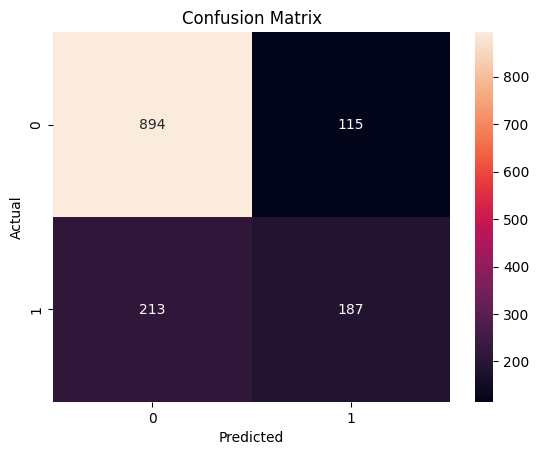

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

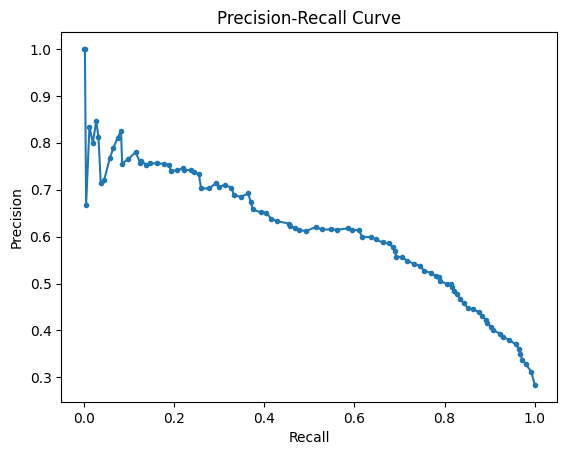

In [14]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

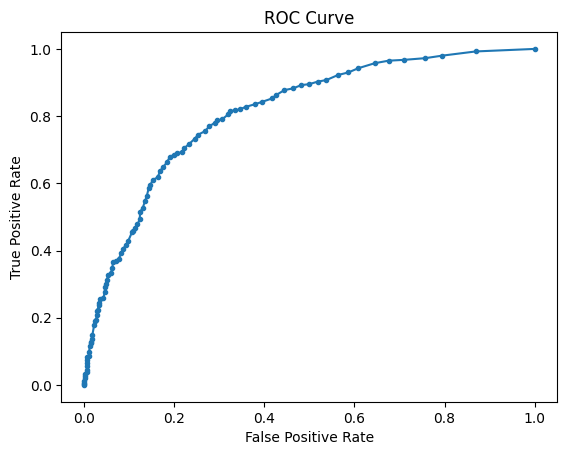

In [15]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Feature ranking: Index(['Tenure Months 0.25084813335947237',
       'Monthly Purchase (Thou. IDR) 0.224593111327882',
       'CLTV (Predicted Thou. IDR) 0.21462329184165785',
       'Payment Method 0.07014633759642733',
       'Games Product 0.05157190713106718', 'Device Class 0.04110442077468712',
       'Music Product 0.030826712582385236',
       'Call Center 0.028087569894298208',
       'Education Product 0.02543807676104654',
       'Use MyApp 0.020498787559199552', 'Video Product 0.018689925117355993',
       'Location 0.008013114472398457', 'Latitude 0.00798111013265715',
       'Longitude 0.007577501449465121'],
      dtype='object')


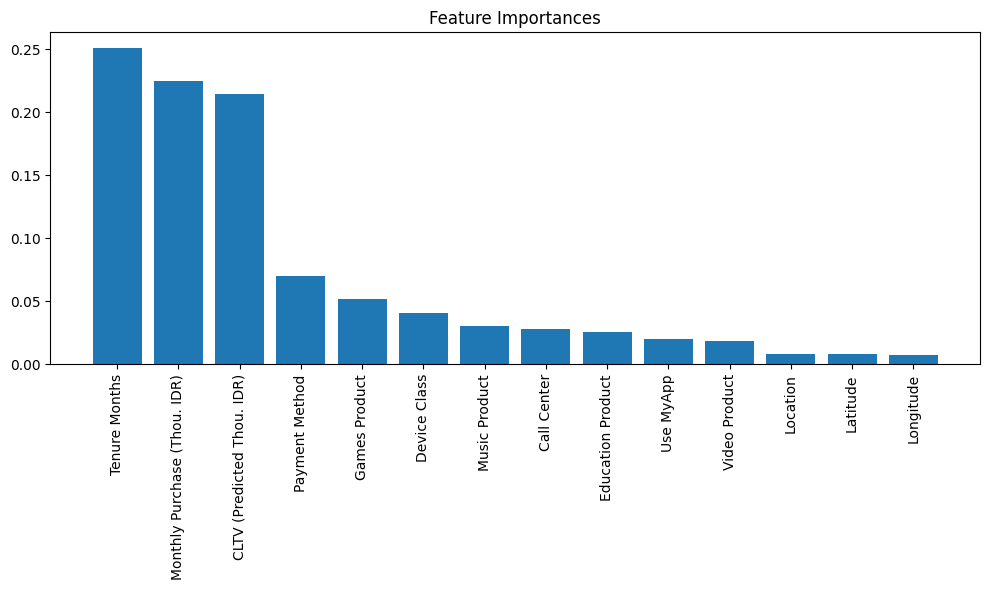

In [16]:
# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

print("Feature ranking:", features[indices] + " " + importances[indices].astype(str))

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [17]:
selector = RFE(model, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]
print("Selected Features: ", selected_features)

Selected Features:  Index(['Tenure Months', 'Device Class', 'Games Product', 'Music Product',
       'Education Product', 'Call Center', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')


In [18]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best Params: ", grid_search.best_params_)

Best Params:  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}


### Evaluate Previous Model

In [19]:
X = df[selected_features]
y = df['Churn Label']

X_train, X_test, y_train, y_test, df_train, df_test = train_test_split(X, y, df, test_size=0.2, random_state=42)

In [20]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1009
           1       0.70      0.46      0.55       400

    accuracy                           0.79      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.79      0.77      1409

AUC-ROC: 0.8321159563924676


### Segmentation

In [21]:
high_risk_customers = df_test.loc[y_pred_proba > 0.7]
medium_risk_customers = df_test.loc[(y_pred_proba > 0.3) & (y_pred_proba <= 0.7)]
low_risk_customers = df_test.loc[y_pred_proba <= 0.3]

# Contoh penawaran insentif
df_test.loc[high_risk_customers.index, 'Offer'] = '50% Discount'
df_test.loc[medium_risk_customers.index, 'Offer'] = '20% Discount'
df_test.loc[low_risk_customers.index, 'Offer'] = 'Standard Promotion'

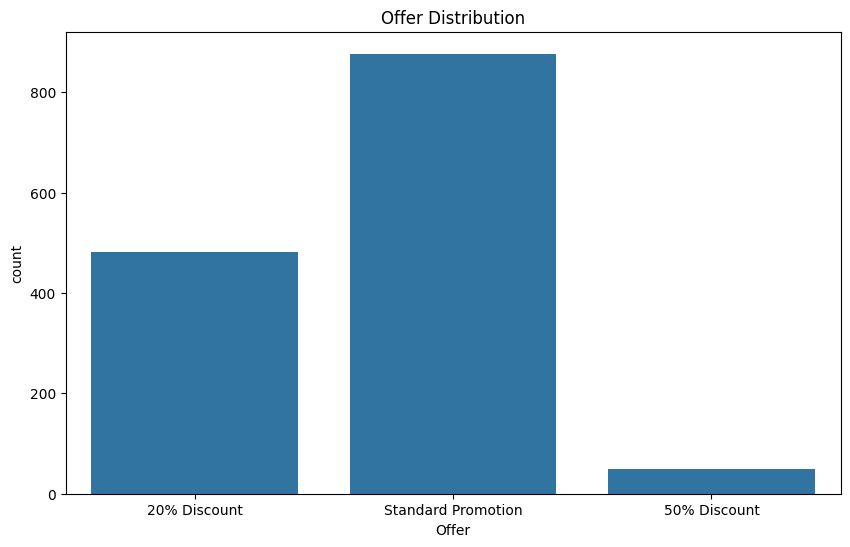

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_test, x='Offer')
plt.title('Offer Distribution')
plt.show()

In [23]:
df_test.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),Offer
185,-1.640813,-0.707359,1,0,0,2,0,0,0,2,1,0.702552,1,-0.632393,0.632393,-0.694264,20% Discount
2715,-0.396431,-0.585198,1,2,0,2,0,0,0,0,0,-0.264614,0,-0.632393,0.632393,0.978639,Standard Promotion
3825,0.149522,-1.236724,0,1,1,1,1,0,1,1,2,-1.487697,0,1.581296,-1.581296,-1.828694,Standard Promotion
1807,-0.843031,-1.073843,0,0,0,2,0,0,0,2,3,0.646050,1,1.581296,-1.581296,1.211950,20% Discount
132,-1.666881,0.310650,1,0,0,0,2,1,2,2,1,1.330711,1,-0.632393,0.632393,-0.767808,Standard Promotion


In [24]:
df_test.to_csv('./Datasets/Telco_Customer_Predictions.csv', index=False)